In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
from matplotlib_venn import venn2_unweighted, venn3_unweighted 
import matplotlib.image as mpimg
from venn import venn
import seaborn as sns
import numpy as np
import random
import statistics as stats
import scipy.interpolate
from scipy.ndimage.filters import gaussian_filter1d
import math
plt.rcParams['figure.figsize']= 8,4
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

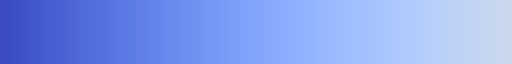

In [3]:
blues_cm = matplotlib.colors.LinearSegmentedColormap.from_list(
    'blue_coolwarm', cm.coolwarm(np.linspace(0, 0.44, 256))
)
blues_cm

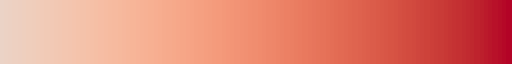

In [4]:
reds_cm = matplotlib.colors.LinearSegmentedColormap.from_list(
    'red_coolwarm', cm.coolwarm(np.linspace(0.56, 1.0, 256))
)
reds_cm

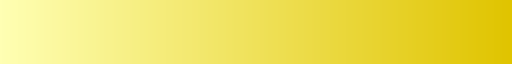

In [5]:
yellow_grad = [(0, "#ffffb3"), (1, "#e0c400")]  # Light yellow to dark yellow
yellows_cm = matplotlib.colors.LinearSegmentedColormap.from_list('yellow_only', yellow_grad, N=256)
yellows_cm

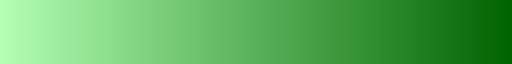

In [6]:
green_grad = [(0, "#b3ffb3"), (1, "#006400")]  # Light green to dark green
greens_cm = matplotlib.colors.LinearSegmentedColormap.from_list('green_only', green_grad, N=256)
greens_cm

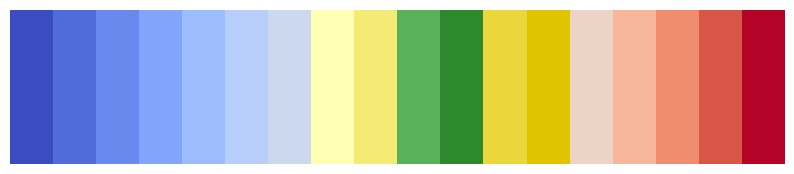

In [7]:
cmap = blues_cm
mypal = [cmap(i / (7 - 1)) for i in range(7)]
mypalette = [mypal[0], mypal[1], mypal[2], mypal[3], mypal[4], mypal[5], mypal[6]]

cmap = yellows_cm
mypal = [cmap(i / (4 - 1)) for i in range(4)]
tmp = [mypal[0], mypal[1]]
mypalette = np.concatenate([mypalette, tmp])

cmap = greens_cm
mypal = [cmap(i / (5 - 1)) for i in range(5)]
tmp = [mypal[2], mypal[3]]
mypalette = np.concatenate([mypalette, tmp])

cmap = yellows_cm
mypal = [cmap(i / (4 - 1)) for i in range(4)]
tmp = [mypal[2], mypal[3]]
mypalette = np.concatenate([mypalette, tmp])

cmap = reds_cm
mypal = [cmap(i / (5 - 1)) for i in range(5)]
tmp = [mypal[0], mypal[1], mypal[2], mypal[3], mypal[4]]
mypalette = np.concatenate([mypalette, tmp])

plt.figure(figsize=(10, 2))
plt.imshow([mypalette], aspect='auto')
plt.axis('off')  # Turn off axis
plt.show()

In [8]:
# Figure 2a

In [9]:
coord=pd.read_csv("coord.txt", sep='\t')
coord["GSA"]=coord["GSA"].astype(str)
coord["subGSA"]=coord["GSA"] + coord["subarea"]
tmp=["01b","04b","04c","05abc","06a","06c","07a","08ab","09a","09b","11ab","12a","14a","19cd","23p"]
counter=0
for i in ["1b","4b","4c","5a","6a","6c","7a","8ab","9a","9b","11b","12_","14_","19c","23a"]:
    coord["subGSA"]=coord["subGSA"].replace(i, tmp[counter])
    counter=counter+1
tmp=["0.362383333","0.3986","2.556233333","2.567883333","2.572","2.582983333"]
counter=0
for i in ["_0.362383333","_0.3986","_2.556233333","_2.567883333","_2.572","_2.582983333"]:
    coord["longitude_dec"]=coord["longitude_dec"].replace(i, tmp[counter])
    counter=counter+1
coord["latitude_dec"]=coord["latitude_dec"].astype(float)
coord["longitude_dec"]=coord["longitude_dec"].astype(float)
coord['samp_numb']=coord['code'].str.split('_').str[-1]
coord['sample']=coord['subGSA'] + "_" + coord['samp_numb'].astype(str)
coord=coord[["sample","subGSA","latitude_dec","longitude_dec"]]
coord=coord.sort_values(by='sample')
coord=coord.reset_index(drop=True)
coord

,sample,subGSA,latitude_dec,longitude_dec
0,01b_01,01b,36.77630,2.556233
1,01b_02,01b,36.77630,2.556233
2,01b_03,01b,36.77630,2.556233
3,01b_04,01b,36.76420,2.567883
4,01b_05,01b,36.76420,2.567883
...,...,...,...,...
2205,27b_50,27b,33.92082,35.077280
2206,27b_6,27b,33.92082,35.077280
2207,27b_7,27b,33.92082,35.077280
2208,27b_8,27b,33.92082,35.077280


In [10]:
df_filt6=pd.read_csv("popmap.filt6.tsv", sep='\t')
filt6_coord = coord[coord['subGSA'].isin(df_filt6['pop'])]
filt6_coord=filt6_coord[["subGSA","latitude_dec","longitude_dec"]]
filt6_coord=filt6_coord.drop_duplicates()
filt6_coord['subGSA'] = filt6_coord['subGSA'].replace('23p', '23a')
filt6_coord=filt6_coord.reset_index(drop=True)
filt6_coord

,subGSA,latitude_dec,longitude_dec
0,01b,36.776300,2.556233
1,01b,36.764200,2.567883
2,01b,36.748783,2.582983
3,01b,36.735300,2.572000
4,05abc,38.932442,1.620483
5,06a,38.161017,0.362383
6,06a,38.244117,0.398600
7,07a,43.067200,4.853700
8,07a,43.004200,4.693300
9,07a,43.047300,4.514300


In [11]:
from glob import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import io
import zipfile
import requests
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from io import BytesIO
import matplotlib.image as mpimg

map_coord=[-7, 38, 29, 48]

def load_bathymetry(zip_file_url):
    """Read zip file from Natural Earth containing bathymetry shapefiles"""
    # Download and extract shapefiles
    r = requests.get(zip_file_url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall("ne_10m_bathymetry_all/")

    # Read shapefiles, sorted by depth
    shp_dict = {}
    files = glob('ne_10m_bathymetry_all/*.shp')
    assert len(files) > 0
    files.sort()
    depths = []
    for f in files:
        depth = '-' + f.split('_')[-1].split('.')[0]  # depth from file name
        depths.append(depth)
        bbox = map_coord  # (x0, y0, x1, y1)
        nei = shpreader.Reader(f, bbox=bbox)
        shp_dict[depth] = nei
    depths = np.array(depths)[::-1]  # sort from surface to bottom
    return depths, shp_dict


if __name__ == "__main__":
    # Load data (14.8 MB file)
    depths_str, shp_dict = load_bathymetry(
        'https://naturalearth.s3.amazonaws.com/' +
        '10m_physical/ne_10m_bathymetry_all.zip')

    # Construct a discrete colormap with colors corresponding to each depth
    depths = depths_str.astype(int)
    N = len(depths)
    nudge = 0.01  # shift bin edge slightly to include data
    boundaries = [min(depths)] + sorted(depths+nudge)  # low to high
    norm = matplotlib.colors.BoundaryNorm(boundaries, N)
    blues_cm = blues_cm.resampled(N)
    colors_depths = blues_cm(norm(depths))

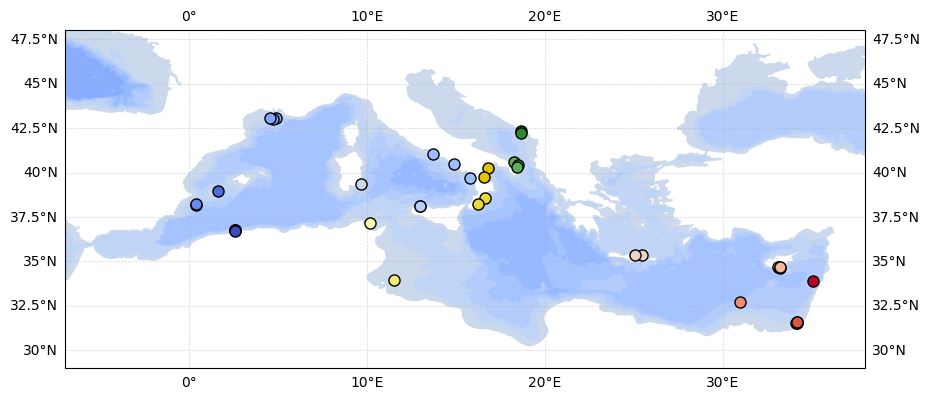

In [12]:
subplot_kw = {'projection': ccrs.PlateCarree()}
fig, ax = plt.subplots(subplot_kw=subplot_kw, figsize=(10, 5))
ax.set_extent(map_coord, crs=ccrs.PlateCarree())  # x0, x1, y0, y1
for i, depth_str in enumerate(depths_str):
    ax.add_geometries(shp_dict[depth_str].geometries(),
                        crs=ccrs.PlateCarree(),
                        color=colors_depths[i])
ax.coastlines(lw=0.0, resolution='50m')
ax.set_position([0.1, 0.05, 0.8, 0.9])

ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, alpha=0.5)

counter=0
for subGSA, group in filt6_coord.groupby('subGSA'):
    ax.plot(group["longitude_dec"], group["latitude_dec"], linestyle="none", marker='o', 
            markerfacecolor=mypalette[counter], markersize=8, alpha=1.0, 
            transform=ccrs.PlateCarree(), label=subGSA, 
            markeredgecolor="black", markeredgewidth=1, zorder=4)
    counter=counter+1

fig.savefig("Fig2a.pdf", format="pdf")
fig.savefig("Fig2a.png", format="png", dpi=500)

In [13]:
#Figure 2b

In [14]:
pca=pd.read_csv("PCA.tsv", sep=' ', header=None, names=["SAMPLE", "PC1", "PC2"])
pca["POP"]="01"
for i in range(0,len(pca)):
    pca["POP"][i]=pca["SAMPLE"][i].split("_")[0]

In [15]:
import re
def extract_and_convert_to_int(s):
    numerical_part = ''.join(re.findall(r'\d+', s))
    return int(numerical_part) if numerical_part else None
temp=[extract_and_convert_to_int(s) for s in pca["POP"]]
macroarea=[]
for i in temp:
    if i<=7:
        macroarea.append("WWMED")
    else:
        if i<=11:
            macroarea.append("WCMED")
        else:
            if i<=21:
                if i in [17,18]:
                    macroarea.append("ADR")
                else:
                    macroarea.append("CMED")
            else:
                macroarea.append("EMED")
pca["macroarea"]=macroarea
pca

,SAMPLE,PC1,PC2,POP,macroarea
0,01b_06,-0.254726,-2.295864,01b,WWMED
1,01b_10,-0.526402,0.062216,01b,WWMED
2,01b_14,1.942353,-0.611084,01b,WWMED
3,01b_16,-1.066685,-0.713219,01b,WWMED
4,01b_17,0.258855,2.265373,01b,WWMED
...,...,...,...,...,...
345,27b_21,2.228441,0.283492,27b,EMED
346,27b_22,0.262337,-1.290668,27b,EMED
347,27b_35,-0.765422,-0.663443,27b,EMED
348,27b_37,0.504223,0.193420,27b,EMED


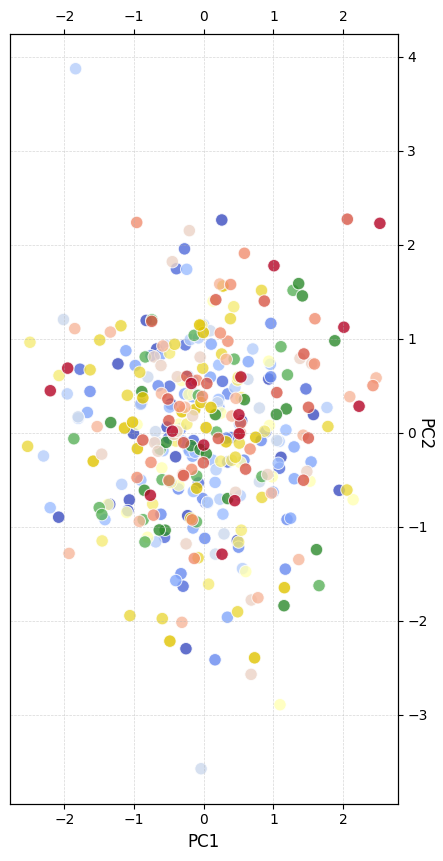

In [16]:
fig,ax=plt.subplots()
fig.set_size_inches(5,10)
sns.scatterplot(data=pca, x="PC1", y="PC2", hue="POP", s=80, alpha=0.8, palette=mypalette, ax=ax)
mypalette1 = [mypalette[0], mypalette[7], mypalette[9], mypalette[16]]
ax.xaxis.set_ticks_position('bottom')  # Bottom ticks
ax.xaxis.set_label_position('bottom')  # Bottom label
ax_top = ax.twiny()
ax_top.set_xlim(ax.get_xlim())  # Make sure the top axis has the same limits as the bottom
ax_top.xaxis.set_ticks_position('top')  # Top ticks
ax_top.xaxis.set_label_position('top')  # Top label
ax.yaxis.set_label_position('right')
ax.yaxis.tick_right()
ax.set_xlabel("PC1",size=12)
ax.set_ylabel('PC2',size=12, rotation=270, y=0.48)
ax.get_legend().remove()    
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
fig.savefig("Fig2b.pdf", format="pdf")
fig.savefig("Fig2b.png", format="png", dpi=500)

In [17]:
# Figure 2c

In [18]:
structure=pd.read_csv("clump_K2.txt", sep=' ', header=None)
structure=structure[[0,1]]
structure.columns=["K1", "K2"]
structure=pd.concat([pca[["SAMPLE", "POP"]], structure], axis=1)
structure

,SAMPLE,POP,K1,K2
0,01b_06,01b,0.6044,0.3956
1,01b_10,01b,0.5838,0.4162
2,01b_14,01b,0.5041,0.4959
3,01b_16,01b,0.5260,0.4740
4,01b_17,01b,0.5530,0.4470
...,...,...,...,...
345,27b_21,27b,0.6025,0.3975
346,27b_22,27b,0.5236,0.4764
347,27b_35,27b,0.5938,0.4062
348,27b_37,27b,0.6073,0.3927


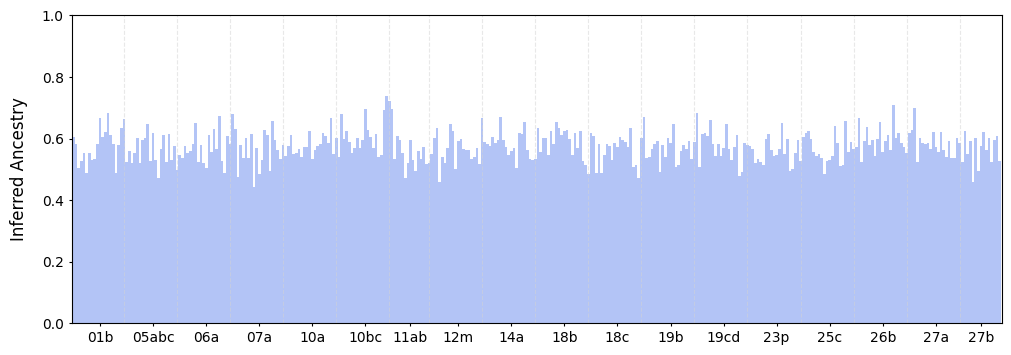

In [19]:
cmap = blues_cm
mypal = [cmap(i / (10 - 1)) for i in range(10)]
mypalette1 = [mypalette[2], "white"]

fig,ax=plt.subplots()
fig.set_size_inches(12,4)
structure.plot(x="SAMPLE", kind='bar', width=1.0, color=mypalette1, alpha=0.5, stacked=True, ax=ax)
vline_pos=structure.tail(1).index
xtick_pos=structure.iloc[[int(len(structure)/2)]].index
for i in np.unique(structure["POP"]):
    tmp=structure[structure["POP"]==i]
    vline_pos=vline_pos.append(tmp.tail(1).index)
    xtick_pos=xtick_pos.append(tmp.iloc[[int(len(tmp)/2)]].index)
vline_pos=vline_pos[1:len(vline_pos)-1]
xtick_pos=xtick_pos[1:]
for i in vline_pos:
    ax.axvline(x=i, color='lightgrey', linestyle='--', linewidth=0.8, alpha=0.5)
    xtick_lab = np.unique(structure["POP"])
    ax.set_xticks(xtick_pos, np.unique(structure["POP"]), fontsize=10, rotation=0)
#for i in [0.2, 0.4, 0.6, 0.8]:
#    ax.axhline(i, color='lightgrey', linestyle='--', linewidth=0.5, alpha=0.5)
ax.tick_params(axis='y', which='both', length=2)
ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=10)
ax.tick_params(axis='x', which='both', length=2)
ax.set_xlabel('')
ax.set_ylabel('Inferred Ancestry', size=12, rotation=90, labelpad=20.0)
ax.yaxis.labelpad=10
ax.set_ylim(0.0,1.0)
ax.get_legend().remove()    

fig.savefig("Fig2c.pdf", format="pdf")
fig.savefig("Fig2c.png", format="png", dpi=500)

In [20]:
# Figure 3

In [21]:
outliers_comm3=pd.read_csv("maf01_outliers_common3.pos.tsv", header=None, sep='\t')
outliers_comm3.columns=["CHROM","POS"]
#outliers_comm3["CHROM"]=natsorted(outliers_comm3["CHROM"])
outliers_comm2=pd.read_csv("maf01_outliers_common2.pos.tsv", header=None, sep='\t')
outliers_comm2.columns=["CHROM","POS"]
#outliers_comm2["CHROM"]=natsorted(outliers_comm2["CHROM"])
outliers=pd.read_csv("maf01_outliers.pos.tsv", header=None, sep='\t')
outliers.columns=["CHROM","POS"]
#outliers["CHROM"]=natsorted(outliers["CHROM"])

fstsnp=pd.read_csv("fstsnp.macroarea.tsv", header=None, sep='\t')
fstsnp.columns=["CHROM", "POS", "FST"]
fstsnp=fstsnp.iloc[:-2]

outliers_comm3=fstsnp.merge(outliers_comm3, on=['CHROM', 'POS'], how='inner')
outliers_comm2=fstsnp.merge(outliers_comm2, on=['CHROM', 'POS'], how='inner')
outliers=fstsnp.merge(outliers, on=['CHROM', 'POS'], how='inner')

fstsnp

,CHROM,POS,FST
0,SUPER_1,99653,0.0084
1,SUPER_1,170902,0.0015
2,SUPER_1,202410,0.0039
3,SUPER_1,506317,0.0048
4,SUPER_1,506325,-0.0037
...,...,...,...
7562,SUPER_22,13644184,0.0019
7563,SUPER_22,13644246,-0.0024
7564,SUPER_22,13644286,-0.0070
7565,SUPER_22,13976098,0.0008


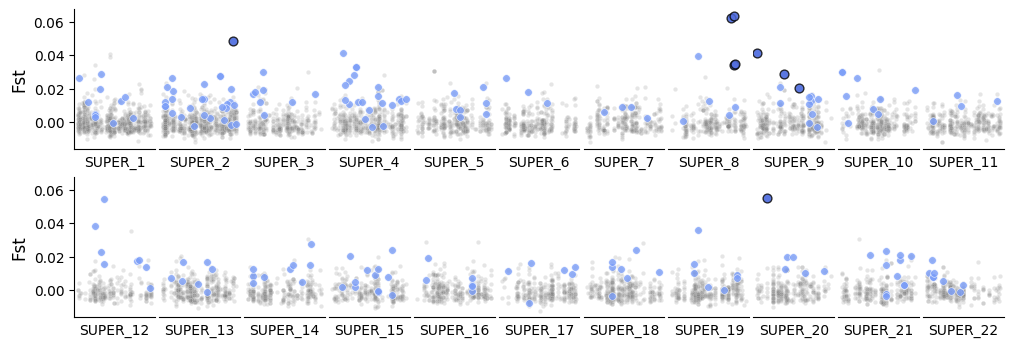

In [22]:
cmap = blues_cm
mypal = [cmap(i / (18 - 1)) for i in range(18)]
PAL = [mypal[3], mypal[3], mypal[8], "grey"]

chrom_list=pd.read_csv("chrom_list.tsv", header=None, sep='\t')
chrom_list=chrom_list[0].tolist()

fig,ax=plt.subplots(2,11, sharey=True)
fig.set_size_inches(12,4)
counter=0
for chrom in chrom_list[0:11]:
    if counter==0:
        temp=fstsnp[fstsnp["CHROM"]==chrom]
        temp=temp.sort_values(by=["CHROM"])
        sns.scatterplot(data=temp, x="POS", y="FST", color=PAL[3], s=10.0, alpha=0.2, ax=ax[0,counter])
        temp=outliers[outliers["CHROM"]==chrom]
        temp=temp.sort_values(by=["CHROM"])
        sns.scatterplot(data=temp, x="POS", y="FST", color=PAL[2], s=30.0, alpha=0.8, ax=ax[0,counter])
        temp=outliers_comm2[outliers_comm2["CHROM"]==chrom]
        temp=temp.sort_values(by=["CHROM"])
        sns.scatterplot(data=temp, x="POS", y="FST", color=PAL[1], s=40.0, alpha=0.8, edgecolor='black', linewidth=1, ax=ax[0,counter])
        temp=outliers_comm3[outliers_comm3["CHROM"]==chrom]
        temp=temp.sort_values(by=["CHROM"])
        sns.scatterplot(data=temp, x="POS", y="FST", color=PAL[0], s=40.0, alpha=0.8, edgecolor='black', linewidth=1, ax=ax[0,counter])
        ax[0, counter].set_xlabel(chrom, size=10, rotation=0)
        ax[0, counter].set_xticks([])
        ax[0, counter].set_xticklabels([])
        ax[0, counter].spines['top'].set_visible(False)
        ax[0, counter].spines['right'].set_visible(False)
        ax[0, counter].set_ylabel('Fst',size=12)
        counter=counter+1
    else:    
        temp=fstsnp[fstsnp["CHROM"]==chrom]
        temp=temp.sort_values(by=["CHROM"])
        sns.scatterplot(data=temp, x="POS", y="FST", color=PAL[3], s=10.0, alpha=0.2, ax=ax[0,counter])
        temp=outliers[outliers["CHROM"]==chrom]
        temp=temp.sort_values(by=["CHROM"])
        sns.scatterplot(data=temp, x="POS", y="FST", color=PAL[2], s=30.0, alpha=0.8, ax=ax[0,counter])
        temp=outliers_comm2[outliers_comm2["CHROM"]==chrom]
        temp=temp.sort_values(by=["CHROM"])
        sns.scatterplot(data=temp, x="POS", y="FST", color=PAL[1], s=40.0, alpha=0.8, edgecolor='black', linewidth=1, ax=ax[0,counter])
        temp=outliers_comm3[outliers_comm3["CHROM"]==chrom]
        temp=temp.sort_values(by=["CHROM"])
        sns.scatterplot(data=temp, x="POS", y="FST", color=PAL[0], s=40.0, alpha=0.8, edgecolor='black', linewidth=1, ax=ax[0,counter])
        ax[0, counter].set_xlabel(chrom, size=10, rotation=0)
        ax[0, counter].set_xticks([])
        ax[0, counter].set_xticklabels([])
        ax[0, counter].yaxis.set_visible(False)
        ax[0, counter].spines['top'].set_visible(False)
        ax[0, counter].spines['left'].set_visible(False)
        ax[0, counter].spines['right'].set_visible(False)
        counter=counter+1

        
counter=0
for chrom in chrom_list[11:22]:
    if counter==0:
        temp=fstsnp[fstsnp["CHROM"]==chrom]
        temp=temp.sort_values(by=["CHROM"])
        sns.scatterplot(data=temp, x="POS", y="FST", color=PAL[3], s=10.0, alpha=0.2, ax=ax[1,counter])
        temp=outliers[outliers["CHROM"]==chrom]
        temp=temp.sort_values(by=["CHROM"])
        sns.scatterplot(data=temp, x="POS", y="FST", color=PAL[2], s=30.0, alpha=0.8, ax=ax[1,counter])
        temp=outliers_comm2[outliers_comm2["CHROM"]==chrom]
        temp=temp.sort_values(by=["CHROM"])
        sns.scatterplot(data=temp, x="POS", y="FST", color=PAL[1], s=40.0, alpha=0.8, edgecolor='black', linewidth=1, ax=ax[1,counter])
        temp=outliers_comm3[outliers_comm3["CHROM"]==chrom]
        temp=temp.sort_values(by=["CHROM"])
        sns.scatterplot(data=temp, x="POS", y="FST", color=PAL[0], s=40.0, alpha=0.8, edgecolor='black', linewidth=1, ax=ax[1,counter])
        ax[1, counter].set_xlabel(chrom, size=10, rotation=0)
        ax[1, counter].set_xticks([])
        ax[1, counter].set_xticklabels([])
        ax[1, counter].spines['top'].set_visible(False)
        ax[1, counter].spines['right'].set_visible(False)
        ax[1, counter].set_ylabel('Fst',size=12)
        counter=counter+1
    else:    
        temp=fstsnp[fstsnp["CHROM"]==chrom]
        temp=temp.sort_values(by=["CHROM"])
        sns.scatterplot(data=temp, x="POS", y="FST", color=PAL[3], s=10.0, alpha=0.2, ax=ax[1,counter])
        temp=outliers[outliers["CHROM"]==chrom]
        temp=temp.sort_values(by=["CHROM"])
        sns.scatterplot(data=temp, x="POS", y="FST", color=PAL[2], s=30.0, alpha=0.8, ax=ax[1,counter])
        temp=outliers_comm2[outliers_comm2["CHROM"]==chrom]
        temp=temp.sort_values(by=["CHROM"])
        sns.scatterplot(data=temp, x="POS", y="FST", color=PAL[1], s=40.0, alpha=0.8, edgecolor='black', linewidth=1, ax=ax[1,counter])
        temp=outliers_comm3[outliers_comm3["CHROM"]==chrom]
        temp=temp.sort_values(by=["CHROM"])
        sns.scatterplot(data=temp, x="POS", y="FST", color=PAL[0], s=40.0, alpha=0.8, edgecolor='black', linewidth=1, ax=ax[1,counter])
        ax[1, counter].set_xlabel(chrom, size=10, rotation=0)
        ax[1, counter].set_xticks([])
        ax[1, counter].set_xticklabels([])
        ax[1, counter].yaxis.set_visible(False)
        ax[1, counter].spines['top'].set_visible(False)
        ax[1, counter].spines['left'].set_visible(False)
        ax[1, counter].spines['right'].set_visible(False)
        counter=counter+1
plt.subplots_adjust(wspace=0.05)
fig.savefig("Fig3.pdf", format="pdf")
fig.savefig("Fig3.png", format="png", dpi=500)